In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Linear SVM

In [2]:
iris = datasets.load_iris()
x = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.float64)

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss = "hinge"))
])

svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

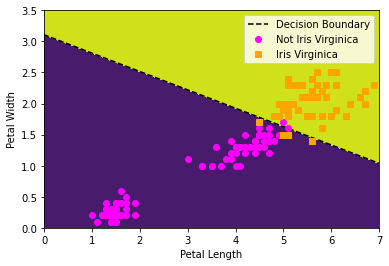

In [3]:
intercept = svm_clf[1].intercept_
theta1 = svm_clf[1].coef_[0][0]
theta2 = svm_clf[1].coef_[0][1]
x1 = np.linspace(-10,10,1000)
x2 = (-intercept-theta1*x1)/theta2
scaled = svm_clf[0].inverse_transform(np.c_[x1,x2])
x1 = scaled[:,0]
x2 = scaled[:,1]
plt.plot(x1,x2, "k--", label = "Decision Boundary")


class0 = [x[i] for i in range(len(x)) if y[i] == 0]
class1 = [x[i] for i in range(len(x)) if y[i] == 1]
plt.plot([val[0] for val in class0], [val[1] for val in class0], "o", color = "magenta", label = "Not Iris Virginica")
plt.plot([val[0] for val in class1], [val[1] for val in class1], "s", color = "orange", label = "Iris Virginica")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

xx,yy = np.meshgrid(np.linspace(0,7,1000), np.linspace(0,3.5,1000))
z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)
plt.xlim(0,7)
plt.ylim(0,3.5)
plt.legend()

# Nonlinear SVM

In [4]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [5]:
x,y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss = "hinge"))
])
polynomial_svm_clf.fit(x,y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

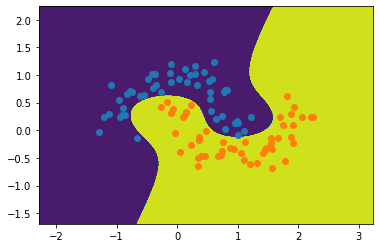

In [6]:
xmax = np.max(x[:,0])+1
xmin = np.min(x[:,0])-1
ymax = np.max(x[:,1])+1
ymin = np.min(x[:,1])-1

xx,yy = np.meshgrid(np.linspace(xmin,xmax,1000), np.linspace(ymin,ymax,1000))
z = polynomial_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)

class0 = np.array([x[i] for i in range(len(x)) if y[i] == 0])
class1 = np.array([x[i] for i in range(len(x)) if y[i] == 1])
plt.scatter(class0[:,0], class0[:,1], label = "Class 0")
plt.scatter(class1[:,0], class1[:,1], label = "Class 1")


We can do this by usign a polynomial kernel instead of a linear SVM with polynomial features. This uses the kernel trick to bypass the need to actually compute the polynomial feature dataset, which grows in size quickly as we use higher degrees.

In [7]:
from sklearn.svm import SVC

Text(0.5, 1.0, 'd=3, r=1, C=5')

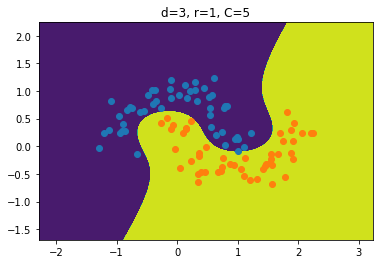

In [8]:
polynomial_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree=3, coef0=1, C=5))
])
polynomial_kernel_svm_clf.fit(x,y)

z = polynomial_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)

class0 = np.array([x[i] for i in range(len(x)) if y[i] == 0])
class1 = np.array([x[i] for i in range(len(x)) if y[i] == 1])
plt.scatter(class0[:,0], class0[:,1], label = "Class 0")
plt.scatter(class1[:,0], class1[:,1], label = "Class 1")
plt.title("d=3, r=1, C=5")

Text(0.5, 1.0, 'd=10, r=100, C=5')

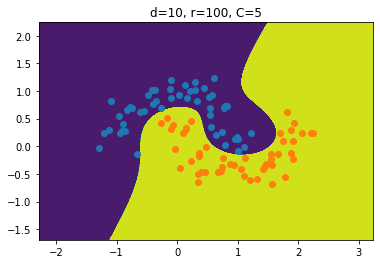

In [9]:
polynomial_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree=10, coef0=100, C=5))
])
polynomial_kernel_svm_clf.fit(x,y)

z = polynomial_kernel_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z)

class0 = np.array([x[i] for i in range(len(x)) if y[i] == 0])
class1 = np.array([x[i] for i in range(len(x)) if y[i] == 1])
plt.scatter(class0[:,0], class0[:,1], label = "Class 0")
plt.scatter(class1[:,0], class1[:,1], label = "Class 1")
plt.title("d=10, r=100, C=5")

 Another commonly used kernel for Nonlinear SVM is the Gaussian or Radial Basis FUnction (RBF) kernel. This is defined:
 
 $$k(x,x') = \exp(-\gamma ||x-x'||^2)$$

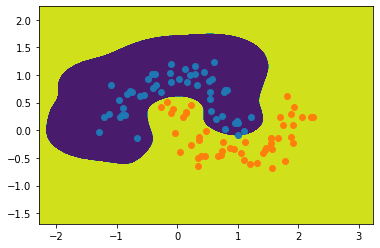

In [10]:
rbf_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma=5, C = 0.001))
])
rbf_svm_clf.fit(x,y)

z = rbf_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(
    xx.shape)
plt.contourf(xx,yy,z)

class0 = np.array([x[i] for i in range(len(x)) if y[i] == 0])
class1 = np.array([x[i] for i in range(len(x)) if y[i] == 1])
plt.scatter(class0[:,0], class0[:,1], label = "Class 0")
plt.scatter(class1[:,0], class1[:,1], label = "Class 1")

# SVM Regression

SVMs can be used for regression by changing the objective from maximising the margin to fitting as many instnaces as possible within a fixed size margin, set by a hyperparameter $\epsilon$.

In [11]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.5)
svm_reg.fit(x,y)

xmax = np.max(x[:,0])+1
xmin = np.min(x[:,0])-1
ymax = np.max(x[:,1])+1
ymin = np.min(x[:,1])-1

xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
z = svm_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.scatter(x[:,0], x[:,1], y)

LinearSVR(epsilon=0.5)

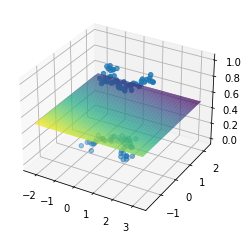

In [20]:
xmax = np.max(x[:,0])+1
xmin = np.min(x[:,0])-1
ymax = np.max(x[:,1])+1
ymin = np.min(x[:,1])-1

xx,yy = np.meshgrid(np.linspace(xmin,xmax,100), np.linspace(ymin,ymax,100))
z = svm_reg.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.scatter(x[:,0], x[:,1], y)


<IPython.core.display.Javascript object>


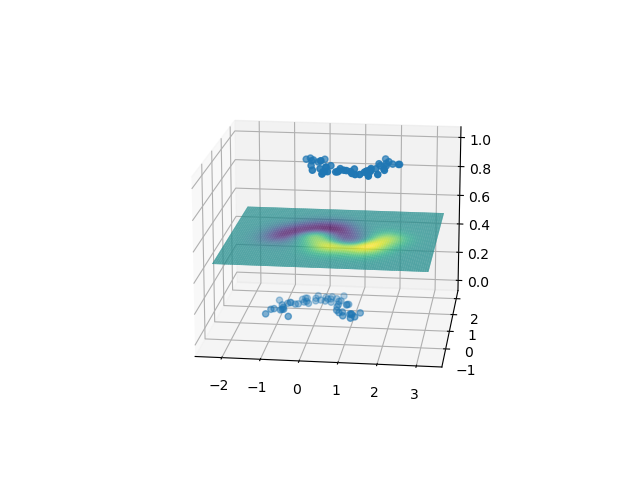

In [22]:
from sklearn.svm import SVR
%matplotlib notebook

svm_reg_rbf = SVR(kernel = "rbf", gamma=5, C = 0.001)
svm_reg_rbf.fit(x,y)


z = svm_reg_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap='viridis', edgecolor='none')

ax.scatter(x[:,0], x[:,1], y)